<a href="https://colab.research.google.com/github/Tmana/TinyML-projects/blob/master/Sine_wave_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

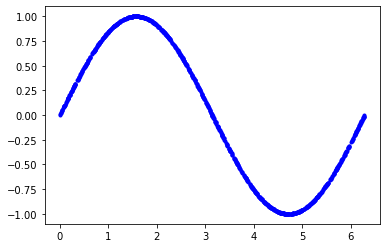

In [9]:
SAMPLES = 1000
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random .uniform(low = 0, high = 2*math.pi, size = SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values, y_values, 'b.')
plt.show()

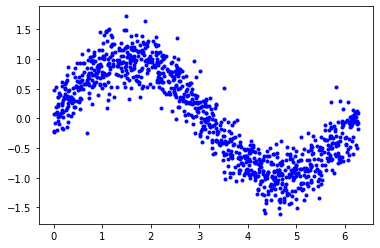

In [13]:
# fuzz the y_values
y_values += 0.2 * np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')

In [18]:
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT]) 
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

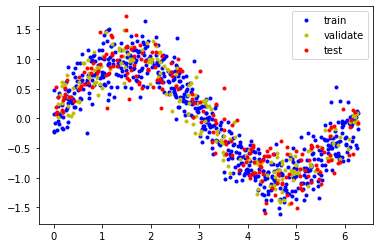

In [21]:
plt.plot(x_train, y_train, 'b.', label = 'train')
plt.plot(x_validate, y_validate, 'y.', label = 'validate')
plt.plot(x_test, y_test, 'r.', label = 'test')
plt.legend()
plt.show()

In [23]:
# use keras to perform simple NN regression
from keras import layers
model_1 = tf.keras.Sequential()

# first layer takes a scalar input and feeds it through 16 neurons, 
# which use a 'relu' activation function.
model_1.add(layers.Dense(16, activation = 'relu', input_shape =(1,)))

# final layer is a single neuron, because we want a signle scalar value as the output.
model_1.add(layers.Dense(1))

# compile model using the standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# print model architecture summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs= 1000, batch_size=16, validation_data=(x_validate, y_validate))

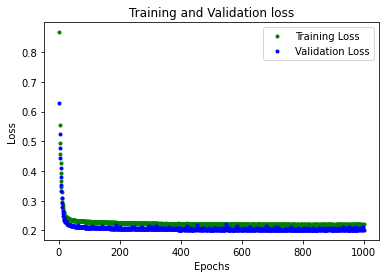

In [32]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'g.', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b.', label= 'Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

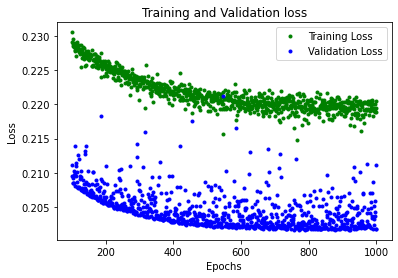

In [27]:
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label= 'Training Loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label= 'Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

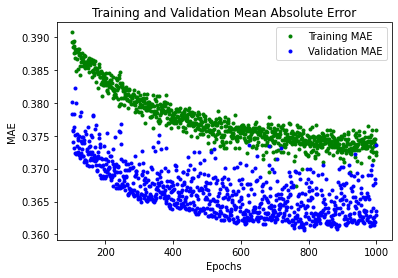

In [30]:
# Draw a graph of mean absolute error, measurement of amount of error of predictions


mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label= 'Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label= 'Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## This mean absolute error and loss arent very good! lets double check why this is by examining the validation data against the model predictions


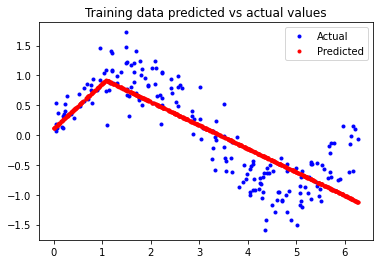

In [31]:


# use the model to make predictions from the validation data
predictions = model_1.predict(x_train)

# plot predictions along with the test data

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label = 'Actual')
plt.plot(x_train, predictions, 'r.', label = 'Predicted')
plt.legend()
plt.show()

 ## Uh oh! our model has over simplified, and is fitting a linear trend onto our very nonlinear sine wave. Lets make a second model with a large hidden layer

In [34]:
model_2 = tf.keras.Sequential()

# first layer takes a scalar input and feeds it through 16 neurons, 
# which use a 'relu' activation function.
model_2.add(layers.Dense(16, activation = 'relu', input_shape =(1,)))

# new second layer will allow the network to learn non-linear representations
model_2.add(layers.Dense(16, activation='relu'))

# final layer is a single neuron, because we want a signle scalar value as the output.
model_2.add(layers.Dense(1))

# compile model using the standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# print model architecture summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [35]:
history_2 = model_2.fit(x_train, y_train, epochs = 600, batch_size=16, validation_data=(x_validate,y_validate))

Epoch 1/600
38/38 [==============================] - 0s 4ms/step - loss: 0.4586 - mae: 0.5746 - val_loss: 0.4286 - val_mae: 0.5528
Epoch 2/600
38/38 [==============================] - 0s 2ms/step - loss: 0.4016 - mae: 0.5373 - val_loss: 0.3768 - val_mae: 0.5140
Epoch 3/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3544 - mae: 0.5046 - val_loss: 0.3271 - val_mae: 0.4873
Epoch 4/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3142 - mae: 0.4758 - val_loss: 0.2912 - val_mae: 0.4596
Epoch 5/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2861 - mae: 0.4542 - val_loss: 0.2601 - val_mae: 0.4297
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2605 - mae: 0.4302 - val_loss: 0.2430 - val_mae: 0.4111
Epoch 7/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2446 - mae: 0.4143 - val_loss: 0.2236 - val_mae: 0.3993
Epoch 8/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2329 - m

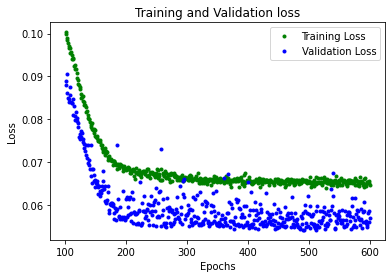

In [38]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label= 'Training Loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label= 'Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

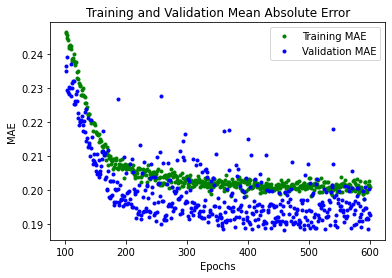

In [39]:
# Draw a graph of mean absolute error, measurement of amount of error of predictions


mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label= 'Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label= 'Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## This model is doing better, so lets see how it does performing predictions on our test data


7/7 [==============================] - 0s 2ms/step - loss: 0.0885 - mae: 0.2350


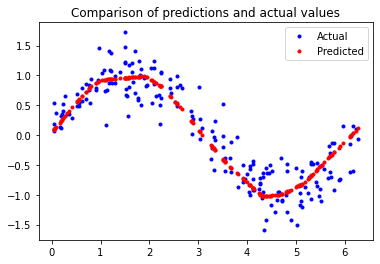

In [41]:
loss = model_2.evaluate(x_test, y_test)
predictions = model_2.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label = 'Actual')
plt.plot(x_test, predictions, 'r.', label = 'Predicted')
plt.legend()
plt.show()